In [17]:
%pylab inline
!pip install python-mnist

Populating the interactive namespace from numpy and matplotlib


In [7]:
from mnist.loader import MNIST
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D

In [8]:
def Accuracy(y_true, y_pred):
  corr = 0
  for num,i in enumerate(y_true):
    if i==y_pred[num]:
      corr+=1
  corr /= len(y_true)
  return corr*100

In [9]:
def loadMNIST():
    mndata = MNIST('/content/MNIST')
    imagesTest, labelsTest = mndata.load_training()
    imagesTrain, labelsTrain = mndata.load_testing()
    return imagesTrain, labelsTrain, imagesTest, labelsTest
X_train, y_train, X_test, y_test = loadMNIST()
X_train = np.array(X_train)
X_test = np.array(X_test)

In [10]:
y_train_nn = np.array([ [0 for i in range(10)] for i in y_train ])
count = 0
for i in y_train:
    y_train_nn[count][i] = 1
    count+=1
y_test_nn = np.array([ [0 for i in range(10)] for i in y_test ])
count = 0
for i in y_test:
    y_test_nn[count][i] = 1
    count+=1

In [11]:
# Pad the data to get 32*32 input dimensions
X_train_pad = X_train.reshape(len(X_train), 28, 28)
X_test_pad = X_test.reshape(len(X_test), 28, 28)
X_train_pad = np.array([np.pad(i, (2)) for i in X_train_pad])
X_test_pad = np.array([np.pad(i, (2)) for i in X_test_pad])

In [12]:
# model
model = Sequential()
model.add(Conv2D(6, kernel_size=5, activation="tanh", input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(16, kernel_size=5, activation="tanh"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=5, activation="tanh"))
model.add(Flatten())
model.add(Dense(184, activation="tanh"))
model.add(Dense(10, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten_2 (Flatten)         (None, 120)              

In [13]:
# Compile, train and find accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_pad, y_train_nn,
                    validation_data = (X_test_pad,y_test_nn), epochs=50, batch_size=64)

Epoch 1/50
157/157 [==============================] - 21s 129ms/step - loss: 0.4028 - accuracy: 0.8792 - val_loss: 0.1817 - val_accuracy: 0.9445
Epoch 2/50
157/157 [==============================] - 20s 127ms/step - loss: 0.1072 - accuracy: 0.9663 - val_loss: 0.1368 - val_accuracy: 0.9583
Epoch 3/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0809 - accuracy: 0.9732 - val_loss: 0.1278 - val_accuracy: 0.9612
Epoch 4/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0632 - accuracy: 0.9799 - val_loss: 0.1226 - val_accuracy: 0.9630
Epoch 5/50
157/157 [==============================] - 20s 127ms/step - loss: 0.0489 - accuracy: 0.9835 - val_loss: 0.1363 - val_accuracy: 0.9587
Epoch 6/50
157/157 [==============================] - 20s 126ms/step - loss: 0.0416 - accuracy: 0.9853 - val_loss: 0.1388 - val_accuracy: 0.9602
Epoch 7/50
157/157 [==============================] - 20s 126ms/step - loss: 0.0310 - accuracy: 0.9891 - val_loss: 0.1176 - val_ac

In [21]:
print("Accuracy of Lenet 5: ",history.history["val_accuracy"][-1]*100, "%" )

Accuracy of Lenet 5:  97.83499836921692 %


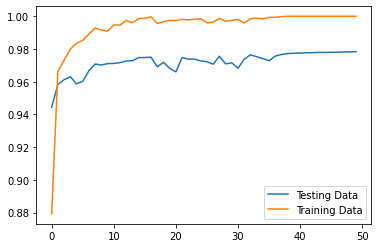

In [19]:
plot(history.history["val_accuracy"], label="Testing Data")
plot(history.history["accuracy"], label="Training Data")
legend()